### NACA 4-Series generator

Philipp Schlatter, 2017-2024

In [50]:
import pylab as plt
from array import *
import numpy as np
%matplotlib notebook

# NACA4412
m=0./100
p=0./10
t=12./100.

# wedge spreading orthogonal to camber line
wd = 0.0005
wd = 0.
# wedge spreading in y direction
#wd1 = 0.000
 

# -----------------
pp=max(p,0.1)     # make sure that you have some refinement at the leading edge even for p=0
NpointsLE=200;      #Number of divisions before x/c=p
dtheta=(np.pi/2)/NpointsLE;
theta = np.arange(0.0, np.pi/2, dtheta)       #Half-cosine distribution up to x=p in order to refine LE
x1 = (1-np.cos(theta))*pp
dx = x1[NpointsLE-1]-x1[NpointsLE-2];     #Linear distribution from x=p to TE
x2 = np.arange(pp,1,dx)
x = np.concatenate((x1,x2))

# original (open NACA)
yt = 5*t*(0.2969*np.sqrt(x)-0.1260*x-0.3516*x**2+0.2843*x**3-0.1015*x**4)
# modified to get zero at the end (closed NACA)
yt = 5*t*(0.2969*np.sqrt(x)-0.1260*x-0.3516*x**2+0.2843*x**3-0.1036*x**4)

# wedge orthogonal to camber line
yt+=wd*x

if p>0:
  yc1 = m/p**2*(2*p*x1-x1**2)
  yc2 = m/(1-p)**2*((1-2*p)+2*p*x2-x2**2)
else:
  yc1 = 0*x1
  yc2 = 0*x2    
  
yc=np.concatenate((yc1,yc2))

if p>0:
  dd1 = 2*m/p**2*(p-x1)
  dd2 = 2*m/(1-p)**2*(p-x2)
  th1=np.arctan(dd1)
  th2=np.arctan(dd2)
else:
  dd1 = 0*x1
  dd2 = 0*x2
  th1 = 0*x1
  th2 = 0*x2     
th = np.concatenate((th1,th2))

# only move in y direction (as in xfoil)
#th = 0*th

xu = x - yt*np.sin(th)
yu = yc + yt*np.cos(th)
xl = x + yt*np.sin(th)
yl = yc - yt*np.cos(th)

#Multiply times chord before generating profile
chord = 1; #chord in [mm]
xu = xu*chord;
yu = yu*chord;
xl = xl*chord;
yl = yl*chord;
x1 = x1*chord;
yc1 = yc1*chord;
x2 = x2*chord;
yc2 = yc2*chord;


# add wedge in y
#yu+=wd1*x
#yl-=wd1*x





<IPython.core.display.Javascript object>


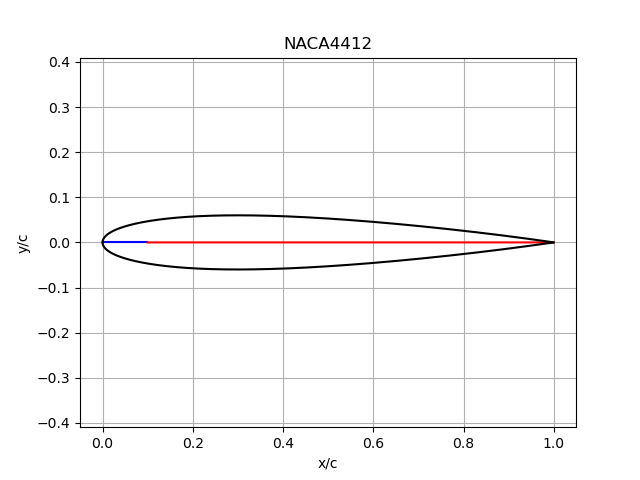

In [51]:
# plotting----------------------

plt.figure(1)
plt.plot(x1, yc1, 'b')
plt.plot(x2,yc2,'r')
plt.plot(xu,yu,'k',xl,yl,'k')
plt.axis('equal')
plt.title('NACA4412')
plt.ylabel('y/c')
plt.xlabel('x/c')
plt.grid(True)

In [52]:
#write out current profile..........
f = open('NACA4412_TEGap.txt','w')
print("NACA4412 KTH Mechanics SimEx interpolated",file=f)
for i in range(xu.size-1,0,-1):
    print(" %18.9f %18.9f"%(xu[i],yu[i]),file=f)
for i in range(0,xl.size):
    print(" %18.9f %18.9f"%(xl[i],yl[i]),file=f)
f.close()

f = open('Pressure_side_NACA4412.txt','w')
#print(" NACA4412 KTH Mechanics SimEx interpolated",file=f)
for i in range(0,xu.size):
    print(" %18.9f %18.9f"%(xu[i],yu[i]),file=f)
f.close()

f = open('Suction_side_NACA4412.txt','w')
for i in range(0,xl.size):
    print(" %18.9f %18.9f"%(xl[i],yl[i]),file=f)
f.close()
